https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def display(img, color='rgb', original=False):
    
    if original==False:

        dpi = 100
        height, width = img.shape[:2]

        figsize = width / float(dpi), height / float(dpi)
        fig = plt.figure(figsize = figsize)
        
        ax = fig.add_axes([0,0,1,1])    
        ax.axis('off')
        
        if color == 'rgb':
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
        else:
            ax.imshow(img, cmap='gray')
            
        plt.show()
        
    else:
        plt.axis('off')
        if color == 'rgb':
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
        else:
            plt.imshow(img, cmap='gray')
        plt.show()

---
### Sample 1

In [6]:
img = cv2.imread('./data/convexhull.png')

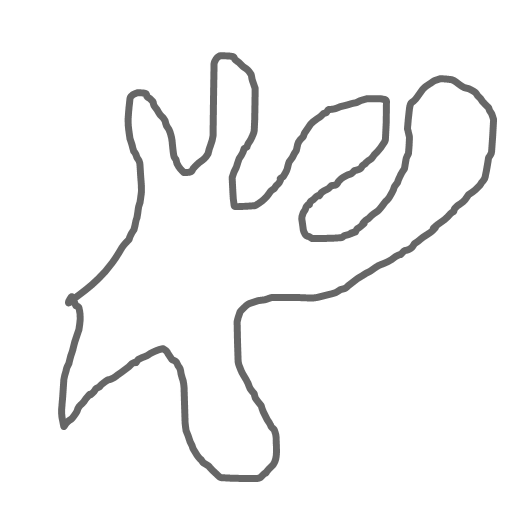

In [9]:
imgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(imgray)

In [10]:
ret, thresh_cv = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh_cv, cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
print("contours : ", contours)
print("hierarchy : ", hierarchy)

contours :  (array([[[207,  44]],

       [[203,  48]],

       [[203,  49]],

       ...,

       [[225,  45]],

       [[224,  45]],

       [[223,  44]]], dtype=int32), array([[[210,  49]],

       [[220,  49]],

       [[230,  59]],

       ...,

       [[206,  54]],

       [[207,  53]],

       [[207,  52]]], dtype=int32))
hierarchy :  [[[-1 -1  1 -1]
  [-1 -1 -1  0]]]


- 바깥선을 그려주기 위해서는 hierarchy[0][0][3] = -1인 contours[0]을 인덱싱해주고,
- 안쪽에 선을 그려주기 위해서는 hierarcht[0][1][3] = 0인 contours[1]을 인덱싱해준다.

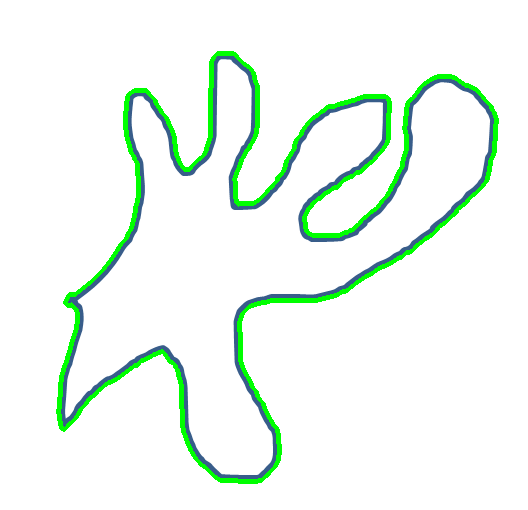

False

In [18]:
cnt = contours[0]
image1 = img.copy()
display(cv2.drawContours(image1, [cnt], 0, (0,255,0), 3))
check = cv2.isContourConvex(cnt)
check

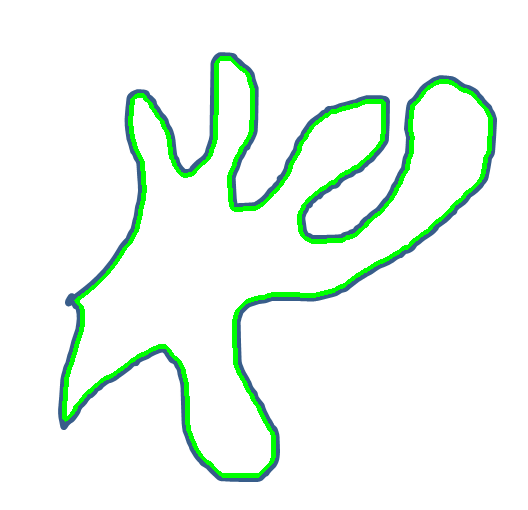

False

In [19]:
cnt2 = contours[1]
image2 = img.copy()
tools.display(cv2.drawContours(image2, [cnt2], 0, (0,255,0), 3))
check = cv2.isContourConvex(cnt2)
check

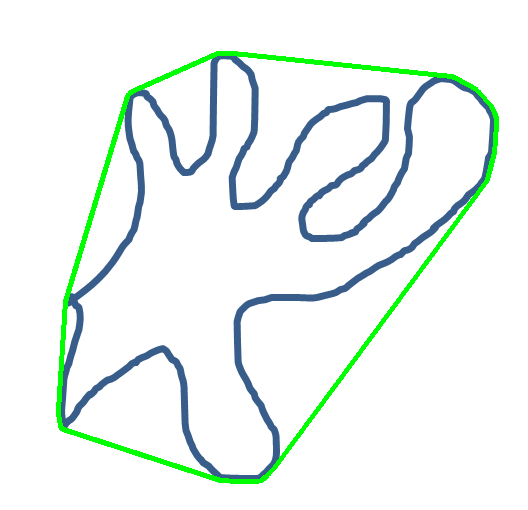

In [20]:
# contour line이 아닌 겉을 모두 감싸고 있는 convex hull을 만들어주기 위해서 check하고, 선을 그려준다.
if not check:
    image3 = img.copy()
    hull = cv2.convexHull(cnt)
    tools.display(cv2.drawContours(image3, [hull], 0, (0,255,0), 3))

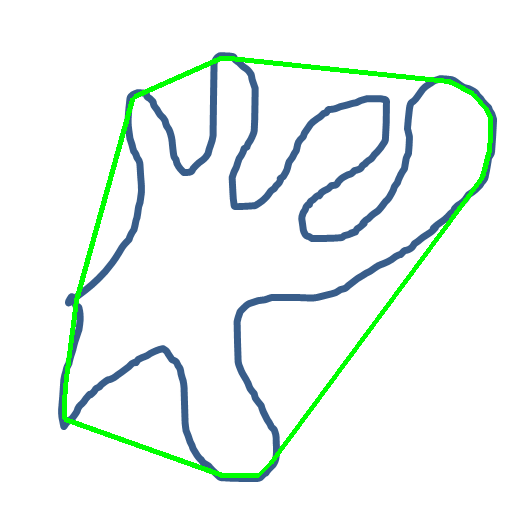

In [21]:
# contour line이 아닌 겉을 모두 감싸고 있는 convex hull을 만들어주기 위해서 check하고, 선을 그려준다.
if not check:
    image4 = img.copy()
    hull = cv2.convexHull(cnt2)
    tools.display(cv2.drawContours(image4, [hull], 0, (0,255,0), 3))

---
### Sample 2

In [22]:
img = cv2.imread('./data/lightning.png')

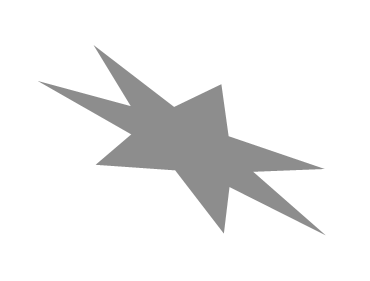

In [23]:
imgray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(imgray)

In [39]:
# Performing OTSU threshold (경계 값을 지정하지 않고 OTSU 알고리즘 선택)
t, t_otsu = cv2.threshold(imgray, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)            # Otsu 알고리즘으로 선택된 경계 값 출력

# Otsu 경계값으로 find contours
contours, hierarchy = cv2.findContours(t_otsu, cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
print("contours : ", contours)
print("hierarchy : ", hierarchy)

otsu threshold: 198.0
contours :  (array([[[  0,   0]],

       [[  0, 260]],

       [[349, 260]],

       [[349,   0]]], dtype=int32), array([[[313, 224]],

       [[314, 223]],

       [[315, 224]],

       [[314, 225]]], dtype=int32), array([[[28, 71]],

       [[29, 70]],

       [[30, 71]],

       [[29, 72]]], dtype=int32), array([[[84, 37]],

       [[85, 36]],

       [[86, 36]],

       ...,

       [[86, 40]],

       [[85, 39]],

       [[85, 38]]], dtype=int32), array([[[83, 36]],

       [[84, 35]],

       [[85, 36]],

       [[84, 37]]], dtype=int32))
hierarchy :  [[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [-1  3 -1  0]]]


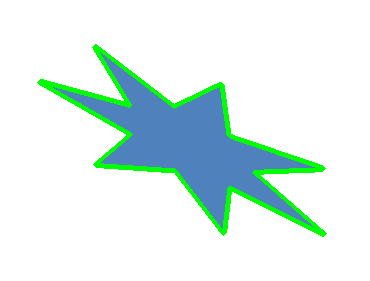

False

In [53]:
cnt = contours[3]
image1 = img.copy()
display(cv2.drawContours(image1, [cnt], 0, (0,255,0), 3))
check = cv2.isContourConvex(cnt)
check

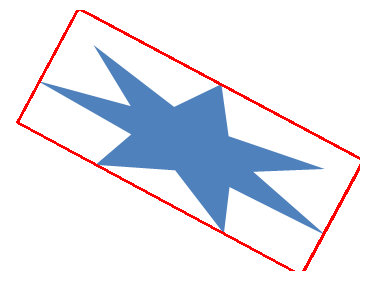

In [55]:
# contour에 외접하는 최소면적의 직사각형을 구하기
rect = cv2.minAreaRect(contours[3])
box = cv2.boxPoints(rect)
box = np.int0(box)

image = img.copy()
display(cv2.drawContours(image, [box], 0, (0, 0, 255), 2))

In [56]:
# 추출된 contours별 Rect 정보 (up-right bounding rectangle의 x,y좌표와 w 너비, h 높이)
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    print(x,y,w,h)

0 0 350 261
313 223 3 3
28 70 3 3
29 36 286 189
83 35 3 3
